In [1]:
import cv2
import math
import numpy as np
from math import degrees as dg
import matplotlib.pyplot as plt

In [28]:
def draw(img, corners, imgpts):
    corner = tuple(corners[0].ravel())
    img = cv2.line(img, corner, tuple(imgpts[0].ravel()), (255, 0,0), 3)
    img = cv2.line(img, corner, tuple(imgpts[1].ravel()), (255, 255, 0), 3)
    img = cv2.line(img, corner, tuple(imgpts[2].ravel()), (0, 255, 0), 3)
    return img


def draw3dbox(img, corners, imgpts):
    imgpts = np.int32(imgpts).reshape(-1,2)
    img = cv2.drawContours(img, [imgpts[:4]],-1,(0,255,0),-3)
    for i, j in zip(range(4),range(4,8)):
        img = cv2.line(img, tuple(imgpts[i]), tuple(imgpts[j]),(255),3)
    img = cv2.drawContours(img, [imgpts[4:]],-1,(0,0,255),3)
    return img

axis3dbox = np.float32([[0,0,0], [0,30,0], [30,30,0], [30,0,0],
                   [0,0,-30],[0,30,-30],[30,30,-30],[30,0,-30] ])

axis = np.float32([[40,0,0], [0,40,0], [0,0,-40]]).reshape(-1,3)
stereo_cam_mt = np.array([[1.14848345e+03,0,6.67053669e+02],
                            [0,1.15696217e+03,4.10006067e+02],
                            [0,0,1]])
stereo_cam_ds = np.array([0.15991044, -0.52151007,  0.01995543, -0.00157179,  0.33406411])

object_2d_position = np.zeros((4, 2), np.float32)
object_3d_position = np.zeros((4, 3), np.float32)
object_3d_position[0]=np.array([37,70,0])
object_3d_position[1]=np.array([0,0,0])
object_3d_position[2]=np.array([75,0,0])
object_3d_position[3]=np.array([37,35,0])

In [31]:
img = cv2.imread('IMG.BMP')


object_2d_position[0, 0] =306#上
object_2d_position[0, 1] =192#上
object_2d_position[1, 0] = 288#左 原点
object_2d_position[1, 1] = 237#左 原点
object_2d_position[2, 0] =334#右
object_2d_position[2, 1] =242#右
object_2d_position[3, 0] = 310#中心
object_2d_position[3, 1] = 220#中心

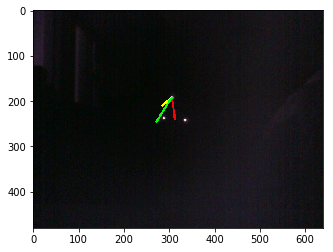

In [32]:
_, rvec, tvec = cv2.solvePnP(object_3d_position, object_2d_position, stereo_cam_mt,stereo_cam_ds) 
distance = math.sqrt(tvec[0] ** 2 + tvec[1] ** 2 + tvec[2] ** 2) 
imgpts, jac = cv2.projectPoints(axis, rvec, tvec, stereo_cam_mt, stereo_cam_ds)
draw(img,object_2d_position,imgpts)
plt.imshow(img)

In [21]:
def GetEuler(rotation_vector,translation_vector):
    """
    此函数用于从旋转向量计算欧拉角
    :param rotation_vector: 输入为旋转向量
    :return: 返回欧拉角在三个轴上的值
    """
    rvec_matrix = cv2.Rodrigues(rotation_vector)[0]
    proj_matrix = np.hstack((rvec_matrix, translation_vector))
    eulerAngles = -cv2.decomposeProjectionMatrix(proj_matrix)[6]
    yaw = eulerAngles[1]
    pitch = eulerAngles[0]
    roll = eulerAngles[2]
    rot_params = np.array([yaw, pitch, roll])
    return rot_params

In [23]:
thet_x = dg(rvec[0][0])
thet_y = dg(rvec[1][0])
thet_z = dg(rvec[2][0])

In [24]:
thet_x,thet_y,thet_z

(-78.44730869051469, -136.0674682707801, 8.307551950889515)

In [22]:
GetEuler(rvec,tvec)

array([[  16.46760166],
       [ 162.99391151],
       [-117.59161594]])